In [1]:
%jsroot off

In [2]:
#include<TFile.h>
#include<TH1.h>
#include<TMath.h>
#include<math.h>
#include<TF1.h>
#include<TLine.h>
#include<TPoint.h>
#include<iostream>
#include<string>
#include<stdio.h>

In [3]:
//gROOT->SetStyle("ATLAS"); // Establecer estilo.
//gStyle->SetOptStat(1002210);
//gStyle->SetOptFit(1112);

In [4]:
TCanvas *c1 = new TCanvas("c1","The FillRandom example",10,10,900,600);
c1->SetGrid();

In [5]:
const Int_t fit = 4; // Opciones 1, 2, 3, 4 = Distribuciones
const Int_t n = 7; // Modificar entre 4 y 7.

In [6]:
const Double_t max_data = 135;
const Double_t min_data = 110;

TH1D *h_data = new TH1D("h_data","h_data",n,min_data,max_data); // Histograma de datos.

// Para 4:
if (n == 4) {
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 6);
    h_data->SetBinContent(3, 7);
    h_data->SetBinContent(4, 1);
}

// Para 5:
if (n == 5) {
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 0);
    h_data->SetBinContent(3, 10);
    h_data->SetBinContent(4, 3);
    h_data->SetBinContent(5, 2);
}

// Para 6:
if (n == 6) {  
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 0);
    h_data->SetBinContent(3, 8);
    h_data->SetBinContent(4, 5);
    h_data->SetBinContent(5, 2);
    h_data->SetBinContent(6, 2);
}

// Para 7:
if (n == 7) {  
    h_data->SetBinContent(1, 1);
    h_data->SetBinContent(2, 0);
    h_data->SetBinContent(3, 1);
    h_data->SetBinContent(4, 6);
    h_data->SetBinContent(5, 4);
    h_data->SetBinContent(6, 0);
    h_data->SetBinContent(7, 2);
}

In [7]:
Double_t myBWDist(Double_t* x, Double_t* par)
{   // Double_t x, Double_t mean, Double_t gamma
    return par[0]*TMath::BreitWigner(x[0], par[1], par[2]);
}

In [8]:
h_data->Draw("E1"); // E1: Para representar los puntos con barras de error.

if (fit == 1) {
    TF1 *pdf = new TF1("pdf","[0]*(2*sqrt(2)*[2]*[1]*(sqrt(pow([2],2)*(pow([2],2)+pow([1],2))))/(TMath::Pi()*sqrt(pow([2],2)+(sqrt(pow([2],2)*(pow([2],2)+pow([1],2)))))))/((pow((pow(x,2)-pow([2],2)),2))+(pow([2],2)*pow([1],2)))",min_data,max_data); //Función de Densidad de Probabilidad.
    pdf->SetParameters(1,h_data->GetStdDev(),h_data->GetMean());
    //pdf->FixParameter(2,h_data->GetMean());
    pdf->SetParNames ("Constant","Gamma","Mean");
}
if (fit == 2) TF1 *pdf = new TF1("pdf","gaus",min_data,max_data);
if (fit == 3) TF1 *pdf = new TF1("pdf","landau",min_data,max_data);
if (fit == 4) {
    TF1 *pdf = new TF1("pdf","myBWDist",min_data,max_data,3);
    pdf->SetParameters(1,1,1);
    //pdf->SetParameters(1,h_data->GetStdDev(),h_data->GetMean());
    //pdf->FixParameter(1,h_data->GetMean());
    //pdf->FixParameter(2,h_data->GetStdDev());
    //pdf->SetParLimits(1,122.0,125.0);
    //pdf->SetParLimits(2,1,2);
    pdf->SetParNames ("Constant","Mean","Gamma");
}

In [9]:
h_data->Fit("pdf","SL");
pdf->SetTitle("Fit");

 FCN=3.64248 FROM MIGRAD    STATUS=CONVERGED     258 CALLS         259 TOTAL
                     EDM=5.82989e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.86462e+01   1.59217e+01   2.20362e-02   1.08215e-05
   2  Mean         1.23834e+02   8.41927e-01   1.16123e-03  -1.35839e-04
   3  Gamma        5.34662e+00   2.91261e+00   3.98121e-03   3.30510e-05
                               ERR DEF= 0.5


In [10]:
TGraphErrors *gr = new TGraphErrors(h_data);
int nPoints = h_data->GetNbinsX();
  for (int i=0; i<nPoints; i++){
    gr->SetPoint(i, h_data->GetBinCenter(i+h_data->FindBin(110)), 0); 
}
(TVirtualFitter::GetFitter())->GetConfidenceIntervals(gr,0.68);
gr->SetFillColor(3);
//h_data->Draw() ; 
//gr->Draw("E3") ; 
//pdf->Draw("same") ;

h_data->Draw("e") ; 
gr->Draw("E3") ; 
h_data->Draw("same e") ; 
pdf->Draw("same") ;

In [11]:
mode_x = pdf->GetMaximumX(min_data,max_data); // Coordenada x del máximo en el ajuste dentro del intervalo [min_data,max_data].
mode_y = pdf->Eval(mode_x); // Coordenada y del máximo.

upper_halfwidth = pdf->GetX(mode_y/2.0,mode_x,max_data);
lower_halfwidth = pdf->GetX(mode_y/2.0,min_data,mode_x);

width = upper_halfwidth-lower_halfwidth;

cout    << "Coordenada del punto máximo en el ajuste: (" << mode_x << "," << mode_y << ")." << endl
        << "Intersecciones en m4l a média altura: " << lower_halfwidth << " GeV" << " y " << upper_halfwidth << " GeV." << endl
        << "Ancho de decaimiento, \u0393 = " << width << " +/- " << sqrt(width) << " GeV." << endl
        << "Tiempo de vida media, \u03C4 = " << 1/(width*1E9) <<  " +/- " << sqrt(1/(width*1E9)) << " s." << endl;
        //<< "Tiempo de vida media, \u03C4 = " << 4.135667696E-15/(2*TMath::Pi()*width*1E9) << " s." << endl; // Consultar.


TLine *l1 = new TLine(lower_halfwidth,mode_y/2.0,upper_halfwidth,mode_y/2.0);
l1->SetLineColor(kBlue);
l1->SetLineStyle(7);
l1->Draw("same");

TLine *l2 = new TLine(mode_x,mode_y,mode_x,0);
l2->SetLineColor(kBlue);
l2->SetLineStyle(7);
l2->Draw("same");

Coordenada del punto máximo en el ajuste: (123.834,6.98298).
Intersecciones en m4l a média altura: 121.161 GeV y 126.507 GeV.
Ancho de decaimiento, Γ = 5.34662 +/- 2.31228 GeV.
Tiempo de vida media, τ = 1.87034e-10 +/- 1.3676e-05 s.


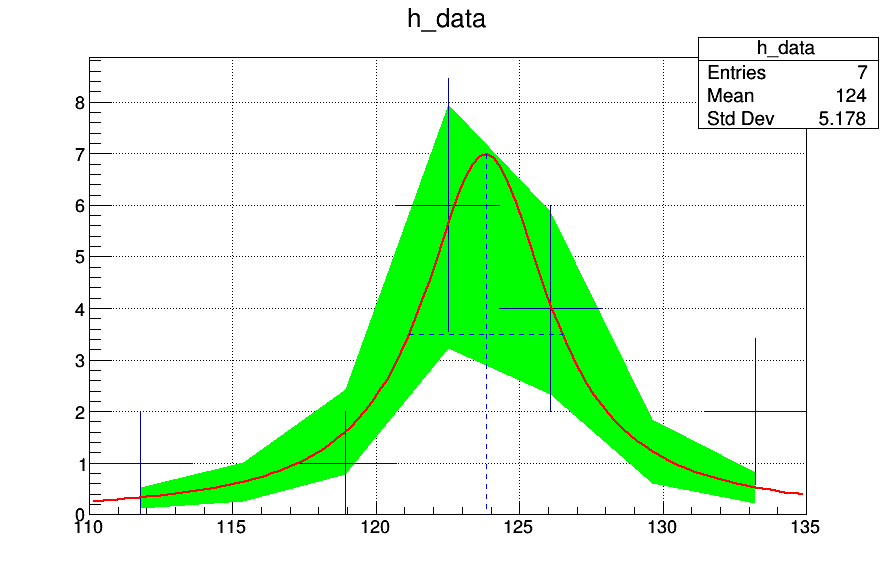

In [12]:
//Histograma que representa la PDF. Toma los cortes en x de los centros de los bines y los evalua en la PDF para obtener la altura de los bines.
TH1F *h_data_f = new TH1F("h_data_f","Test random numbers",n,min_data,max_data);
for (int i=1; i<n+1; i++) h_data_f->SetBinContent(i,pdf->Eval(h_data->GetXaxis()->GetBinCenter(i)));
//h_data_f->Draw("SAME E1");
c1->Draw();

In [13]:
// TFile myfile("fillrandom.root","RECREATE");
// pdf->Write();
// h_data_f->Write();

In [14]:
//apply the chi2 test and retrieve the residuals
Double_t res[n], x[n];
h_data->Chi2Test(h_data_f,"UU P",res);

Chi2 = 2.577190, Prob = 0.764828, NDF = 5, igood = 3


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.

Info in <TH1D::Chi2TestX>: There is a bin in h2 with less than 1 event.



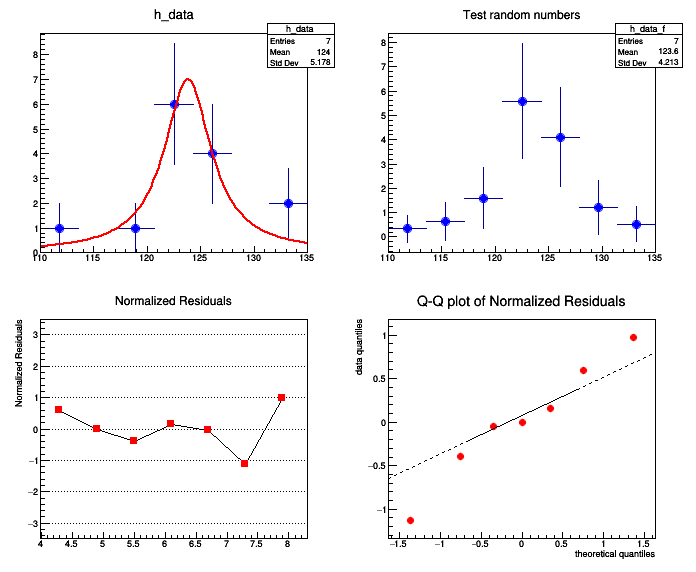

In [15]:
//Graph for Residuals
for (Int_t i=0; i<n; i++) x[i]= 4.+i*12./20.+12./40.;
TGraph *resgr = new TGraph(n,x,res);
resgr->GetXaxis()->SetRangeUser(4,16);
resgr->GetYaxis()->SetRangeUser(-3.5,3.5);
resgr->GetYaxis()->SetTitle("Normalized Residuals");
resgr->SetMarkerStyle(21);
resgr->SetMarkerColor(2);
resgr->SetMarkerSize(.9);
resgr->SetTitle("Normalized Residuals");
 
//Quantile-Quantile plot
TF1 *f = new TF1("f","TMath::Gaus(x,0,1)",-10,10);
TGraphQQ *qqplot = new TGraphQQ(n,res,f);
qqplot->SetMarkerStyle(20);
qqplot->SetMarkerColor(2);
qqplot->SetMarkerSize(.9);
qqplot->SetTitle("Q-Q plot of Normalized Residuals");
 
//create Canvas
TCanvas *c2 = new TCanvas("c2","Chistat Plot",10,10,700,600);
c2->Divide(2,2);
 
// Draw Histogramms and Graphs
c2->cd(1);
h_data->SetMarkerColor(4);
h_data->SetMarkerStyle(20);
 
h_data->Draw("E");
 
c2->cd(2);
h_data_f->Draw("E");
h_data_f->SetMarkerColor(4);
h_data_f->SetMarkerStyle(20);
 
c2->cd(3);
gPad->SetGridy();
resgr->Draw("APL");
 
c2->cd(4);
qqplot->Draw("AP");
 
c2->cd(0);

c2->Draw();
c2->Update();

Esqueleto del código:
https://root.cern/doc/v610/fillrandom_8C.html

Ejemplo aplicación Chi2:
https://root.cern/doc/v610/chi2test_8C_source.html
http://www.hep.by/root/TH1.html#TH1:Chi2Test
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.173.6388&rep=rep1&type=pdf
https://arxiv.org/pdf/physics/0605123.pdf

Funciones pruebas de bondad:
KolmogorovTest
Chi2Test

Información sobre histogramas y ajustes con ROOT:
http://hadron.physics.fsu.edu/~skpark/document/ROOT/RootLecture/RootLecture290305.pdf